- [🤑 Data Science for Financial Markets 📈💰](https://www.kaggle.com/code/lusfernandotorres/data-science-for-financial-markets#yfinance)
- [Portfolio - VectorBT PRO](https://vectorbt.pro/features/portfolio/)

In [1]:
from vectorbtpro import *
import quantstats as qs
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [3]:
# vbt.YFData.pull(['AAPL', 'TSLA', 'DIS', 'AMD'], start='2020-07-01').get('Close')
raw_data = vbt.YFData.pull(['AAPL', 'TSLA', 'DIS', 'AMD'], start='2020-07-01', execute_kwargs=dict(engine="threadpool"))
df = raw_data.get('Close')
# df.index = df.index.map(lambda x: x.date())
df.index = df.index.date
df

symbol            AAPL        TSLA         DIS         AMD
2020-07-01   88.698456   74.641998  111.630959   52.580002
2020-07-02   88.698456   80.577332  110.811089   52.340000
2020-07-06   91.071152   91.438667  113.033630   53.400002
2020-07-07   90.788589   92.657333  112.243385   52.930000
2020-07-08   92.903069   91.058670  115.236420   53.430000
...                ...         ...         ...         ...
2024-12-20  254.490005  421.059998  112.029999  119.209999
2024-12-23  255.270004  430.600006  111.400002  124.599998
2024-12-24  258.200012  462.279999  112.559998  126.290001
2024-12-26  259.019989  454.130005  112.550003  125.059998
2024-12-27  255.589996  431.660004  111.550003  125.190002

[1131 rows x 4 columns]

In [4]:
# NOTE: missing the first day
return_df = df.vbt.to_returns()
return_df

symbol          AAPL      TSLA       DIS       AMD
2020-07-01  0.000000  0.000000  0.000000  0.000000
2020-07-02  0.000000  0.079517 -0.007344 -0.004565
2020-07-06  0.026750  0.134794  0.020057  0.020252
2020-07-07 -0.003103  0.013328 -0.006991 -0.008802
2020-07-08  0.023290 -0.017254  0.026666  0.009446
...              ...       ...       ...       ...
2024-12-20  0.018816 -0.034642  0.005926  0.002776
2024-12-23  0.003065  0.022657 -0.005623  0.045214
2024-12-24  0.011478  0.073572  0.010413  0.013563
2024-12-26  0.003176 -0.017630 -0.000089 -0.009740
2024-12-27 -0.013242 -0.049479 -0.008885  0.001040

[1131 rows x 4 columns]

In [5]:
sp500 = qs.utils.download_returns('^GSPC')['2010-07-01':]
sp500

Date
2010-07-01   -0.003240
2010-07-02   -0.004662
2010-07-06    0.005359
2010-07-07    0.031331
2010-07-08    0.009413
                ...   
2024-12-23    0.007287
2024-12-24    0.011043
2024-12-26   -0.000406
2024-12-27   -0.011056
2024-12-30   -0.016557
Name: Close, Length: 3649, dtype: float64

In [6]:
# sp500.vbt.returns.qs.full_report()

In [7]:
market_prices = yf.download("^GSPC",start = '2010-07-01')['Close']
market_prices

[*********************100%***********************]  1 of 1 completed


Ticker            ^GSPC
Date                   
2010-07-01  1027.369995
2010-07-02  1022.580017
2010-07-06  1028.060059
2010-07-07  1060.270020
2010-07-08  1070.250000
...                 ...
2024-12-23  5974.069824
2024-12-24  6040.040039
2024-12-26  6037.589844
2024-12-27  5970.839844
2024-12-30  5871.979980

[3649 rows x 1 columns]

In [8]:
symbol_wrapper = raw_data.get_symbol_wrapper()
filled_allocations = symbol_wrapper.fill()
filled_allocations.index = filled_allocations.index.date
filled_allocations

symbol      AAPL  TSLA  DIS  AMD
2020-07-01   NaN   NaN  NaN  NaN
2020-07-02   NaN   NaN  NaN  NaN
2020-07-06   NaN   NaN  NaN  NaN
2020-07-07   NaN   NaN  NaN  NaN
2020-07-08   NaN   NaN  NaN  NaN
...          ...   ...  ...  ...
2024-12-20   NaN   NaN  NaN  NaN
2024-12-23   NaN   NaN  NaN  NaN
2024-12-24   NaN   NaN  NaN  NaN
2024-12-26   NaN   NaN  NaN  NaN
2024-12-27   NaN   NaN  NaN  NaN

[1131 rows x 4 columns]

## Baseline (Equal Weight)

In [9]:
equal_weight_portfolio = (return_df / len(return_df.columns)).sum(axis=1)
equal_weight_portfolio

2020-07-01    0.000000
2020-07-02    0.016902
2020-07-06    0.050463
2020-07-07   -0.001392
2020-07-08    0.010537
                ...   
2024-12-20   -0.001781
2024-12-23    0.016328
2024-12-24    0.027257
2024-12-26   -0.006071
2024-12-27   -0.017642
Length: 1131, dtype: float64

[UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead · Issue #381 · ranaroussi/quantstats](https://github.com/ranaroussi/quantstats/issues/381)

In [10]:
# qs.reports.full(equal_weight_portfolio, benchmark=sp500)

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-07-02   2020-07-02
End Period                 2024-12-27   2024-12-27
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          91.63%       215.3%
CAGR﹪                     10.52%       19.31%

Sharpe                     1.16         1.16
Prob. Sharpe Ratio         97.81%       97.85%
Smart Sharpe               1.14         1.14
Sortino                    1.65         1.68
Smart Sortino              1.64         1.66
Sortino/√2                 1.17         1.19
Smart Sortino/√2           1.16         1.17
Omega                      1.17         1.17

Max Drawdown               -25.43%      -52.21%
Longest DD Days            745          918
Volatility (ann.)          19.88%       38.55%
R^2                        0.64         0.64
Information Ratio          0.04         0.04
Calmar             

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-01-04  2022-12-28  2024-07-09   918    -52.208456        -49.929775
2  2024-07-11  2024-08-07  2024-11-07   120    -19.680764        -17.875466
3  2021-02-09  2021-05-19  2021-07-30   172    -17.332372        -16.934088
4  2020-09-02  2020-09-23  2020-11-20    80    -16.023231        -15.408693
5  2021-11-09  2021-12-20  2021-12-23    45     -9.449627         -7.774314

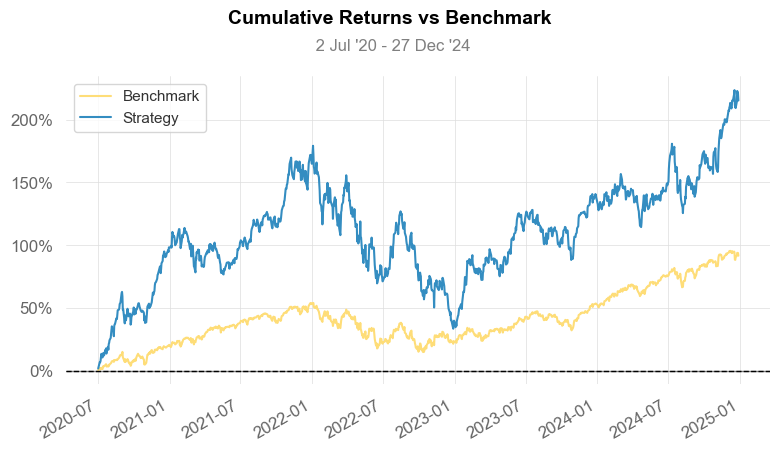

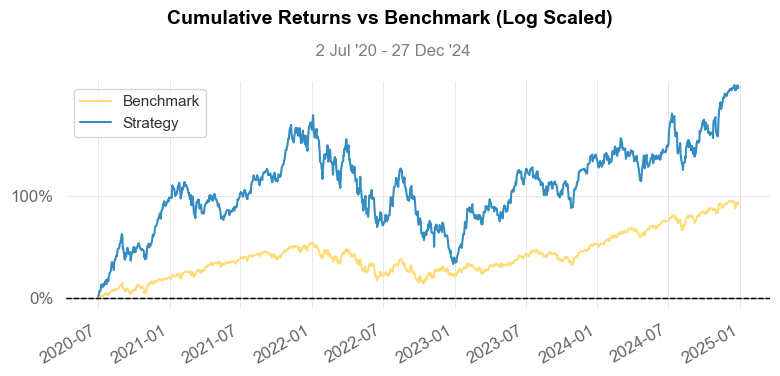

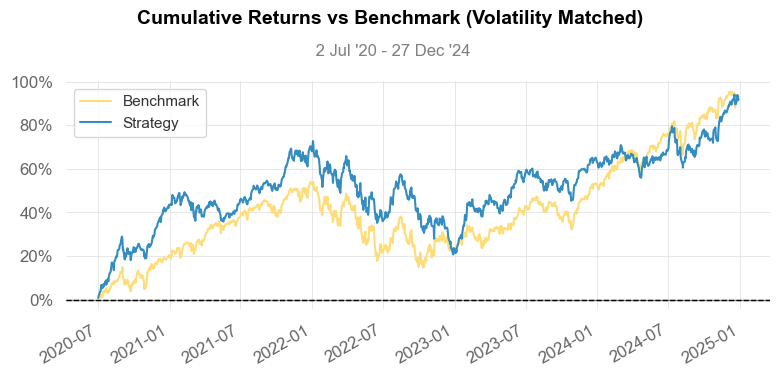

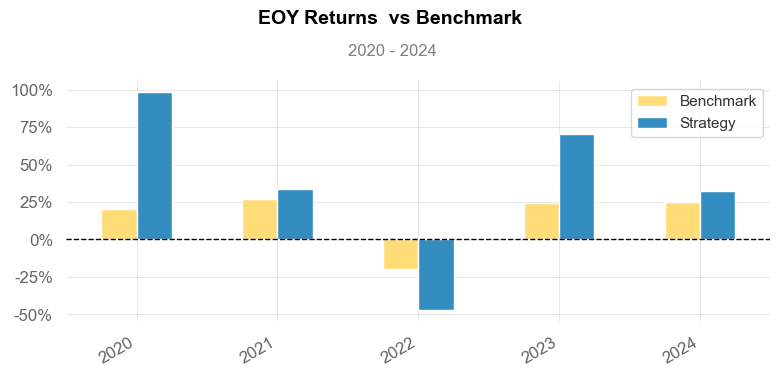

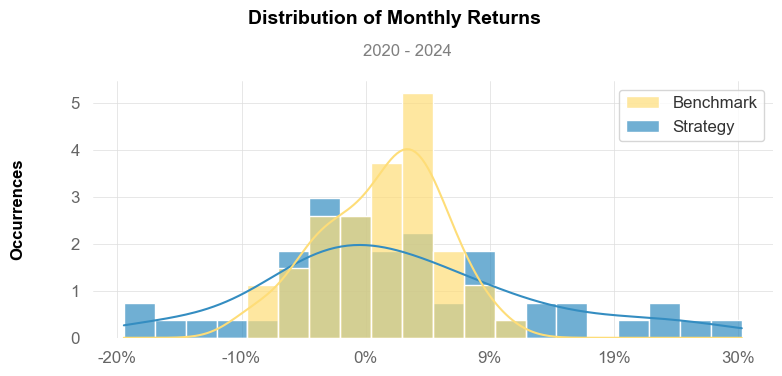

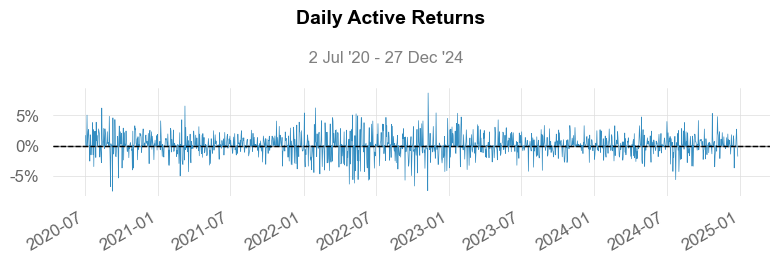

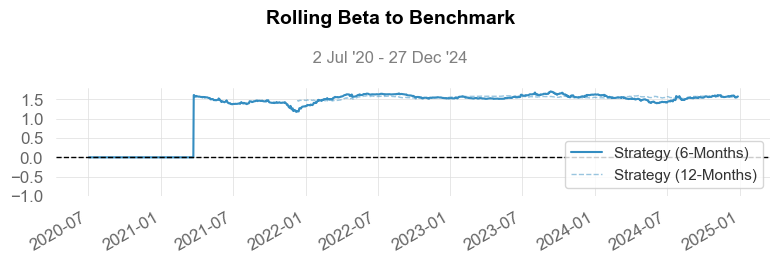

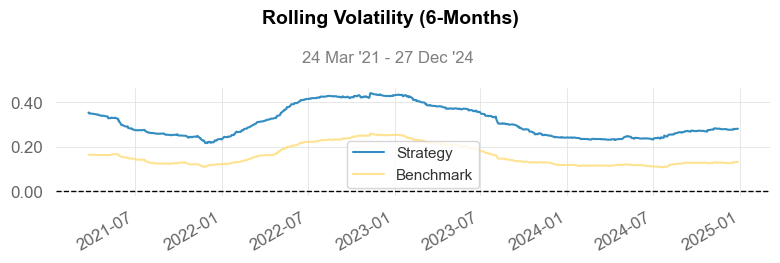

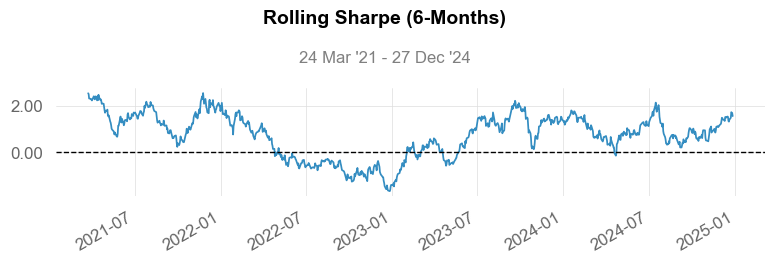

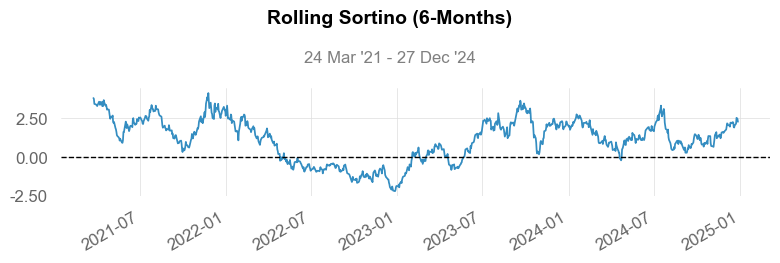

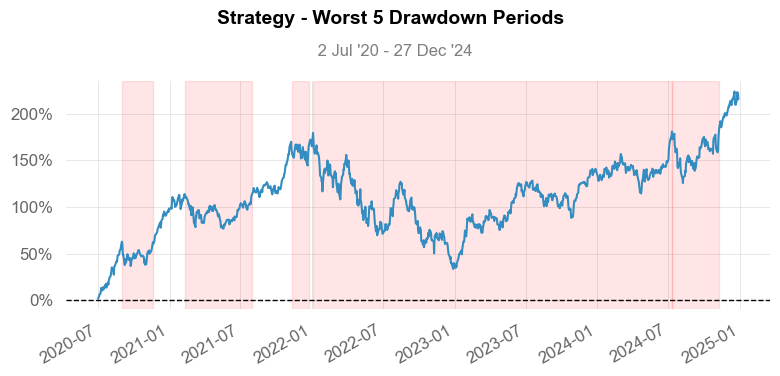

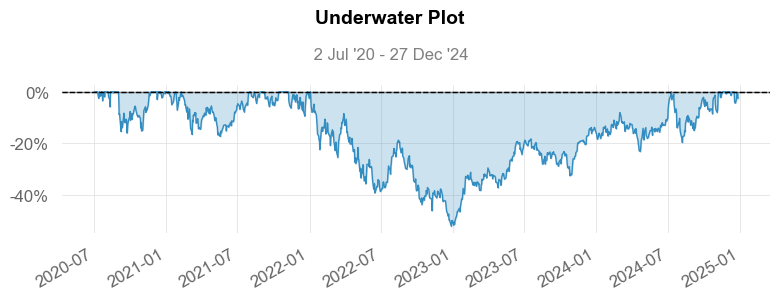

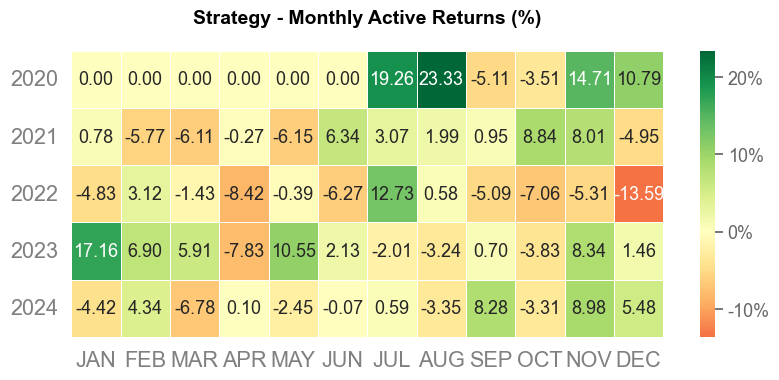

/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1021: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1024: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. Thi

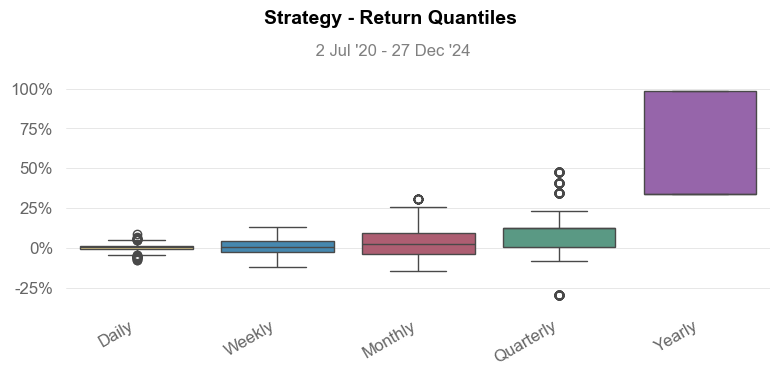

In [11]:
# https://vectorbt.pro/pvt_40509f46/api/returns/qs_adapter/#vectorbtpro.returns.qs_adapter
equal_weight_portfolio.vbt.returns(bm_returns=sp500, freq='d').qs.full_report()

In [12]:
for symbol in filled_allocations.columns:
    filled_allocations[symbol] = 1 / len(filled_allocations.columns)
filled_allocations

symbol      AAPL  TSLA   DIS   AMD
2020-07-01  0.25  0.25  0.25  0.25
2020-07-02  0.25  0.25  0.25  0.25
2020-07-06  0.25  0.25  0.25  0.25
2020-07-07  0.25  0.25  0.25  0.25
2020-07-08  0.25  0.25  0.25  0.25
...          ...   ...   ...   ...
2024-12-20  0.25  0.25  0.25  0.25
2024-12-23  0.25  0.25  0.25  0.25
2024-12-24  0.25  0.25  0.25  0.25
2024-12-26  0.25  0.25  0.25  0.25
2024-12-27  0.25  0.25  0.25  0.25

[1131 rows x 4 columns]

In [13]:
# https://vectorbt.pro/pvt_40509f46/tutorials/portfolio-optimization/#simulation
pf = vbt.Portfolio.from_orders(
    # close=raw_data.get("Close"),
    close=df,
    size=filled_allocations,
    size_type="targetpercent",
    group_by=True,  
    cash_sharing=True,
    call_seq="auto"  
)
pf.stats()

Start Index                           2020-07-01 00:00:00
End Index                             2024-12-27 00:00:00
Total Duration                         1131 days 00:00:00
Start Value                                         100.0
Min Value                                           100.0
Max Value                                      323.586111
End Value                                      315.304286
Total Return [%]                               215.304286
Benchmark Return [%]                           201.121257
Position Coverage [%]                               100.0
Max Gross Exposure [%]                              100.0
Max Drawdown [%]                                52.208456
Max Drawdown Duration                   631 days 00:00:00
Total Orders                                         4524
Total Fees Paid                                       0.0
Total Trades                                         2181
Win Rate [%]                                    70.096463
Best Trade [%]

In [14]:
sim_alloc = pf.get_asset_value(group_by=False).vbt / pf.value
sim_alloc

symbol      AAPL  TSLA   DIS   AMD
2020-07-01  0.25  0.25  0.25  0.25
2020-07-02  0.25  0.25  0.25  0.25
2020-07-06  0.25  0.25  0.25  0.25
2020-07-07  0.25  0.25  0.25  0.25
2020-07-08  0.25  0.25  0.25  0.25
...          ...   ...   ...   ...
2024-12-20  0.25  0.25  0.25  0.25
2024-12-23  0.25  0.25  0.25  0.25
2024-12-24  0.25  0.25  0.25  0.25
2024-12-26  0.25  0.25  0.25  0.25
2024-12-27  0.25  0.25  0.25  0.25

[1131 rows x 4 columns]

In [15]:
sim_alloc.vbt.plot(
   trace_kwargs=dict(stackgroup="one"),
   use_gl=False
).show()

In [16]:
pf.plot_allocations()

FigureWidget({
    'data': [{'fillcolor': 'rgba(229,134,6,0.3000)',
              'legendgroup': 'area_0',
              'line': {'color': 'rgb(229, 134, 6)', 'shape': 'hv'},
              'name': 'AAPL',
              'showlegend': True,
              'stackgroup': 'one',
              'type': 'scatter',
              'uid': '856bc3a9-ed6f-4c42-94f9-cbd2fe93901c',
              'x': array([datetime.datetime(2020, 7, 1, 0, 0),
                          datetime.datetime(2020, 7, 2, 0, 0),
                          datetime.datetime(2020, 7, 6, 0, 0), ...,
                          datetime.datetime(2024, 12, 24, 0, 0),
                          datetime.datetime(2024, 12, 26, 0, 0),
                          datetime.datetime(2024, 12, 27, 0, 0)], dtype=object),
              'y': array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25])},
             {'fillcolor': 'rgba(93,105,177,0.3000)',
              'legendgroup': 'area_1',
              'line': {'color': 'rgb(93, 105, 177)', 'shape': 'h

## Random Weights

In [17]:
def random_allocate_func():
    weights = np.random.uniform(size=symbol_wrapper.shape[1])
    return weights / weights.sum()

random_allocate_func()

array([0.49616245, 0.24218347, 0.15346837, 0.10818571])

In [18]:
random_allocations = filled_allocations.apply(lambda row: random_allocate_func(), axis=1, result_type='broadcast')
random_allocations

symbol          AAPL      TSLA       DIS       AMD
2020-07-01  0.231861  0.148521  0.450171  0.169447
2020-07-02  0.535639  0.077837  0.248317  0.138207
2020-07-06  0.065463  0.233362  0.375369  0.325806
2020-07-07  0.166898  0.385062  0.178200  0.269840
2020-07-08  0.029145  0.397074  0.138913  0.434868
...              ...       ...       ...       ...
2024-12-20  0.180340  0.165639  0.274214  0.379807
2024-12-23  0.397325  0.107722  0.161463  0.333491
2024-12-24  0.311068  0.215496  0.260346  0.213089
2024-12-26  0.182463  0.052814  0.610908  0.153816
2024-12-27  0.198983  0.329993  0.180076  0.290948

[1131 rows x 4 columns]

In [19]:
random_pf = vbt.Portfolio.from_orders(
    close=df,
    size=random_allocations,
    size_type="targetpercent",
    group_by=True,  
    cash_sharing=True,
    call_seq="auto"  
)
random_pf.stats()

Start Index                           2020-07-01 00:00:00
End Index                             2024-12-27 00:00:00
Total Duration                         1131 days 00:00:00
Start Value                                         100.0
Min Value                                        93.93179
Max Value                                      217.384989
End Value                                      210.653794
Total Return [%]                               110.653794
Benchmark Return [%]                           201.121257
Position Coverage [%]                               100.0
Max Gross Exposure [%]                              100.0
Max Drawdown [%]                                56.790121
Max Drawdown Duration                   790 days 00:00:00
Total Orders                                         4524
Total Fees Paid                                       0.0
Total Trades                                         2242
Win Rate [%]                                    52.546917
Best Trade [%]

In [20]:
(random_pf.get_asset_value(group_by=False).vbt / random_pf.value).vbt.plot(
   trace_kwargs=dict(stackgroup="one"),
   use_gl=False
).show()

In [21]:
random_pf.plot_allocations()

FigureWidget({
    'data': [{'fillcolor': 'rgba(229,134,6,0.3000)',
              'legendgroup': 'area_0',
              'line': {'color': 'rgb(229, 134, 6)', 'shape': 'hv'},
              'name': 'AAPL',
              'showlegend': True,
              'stackgroup': 'one',
              'type': 'scatter',
              'uid': 'eec5f318-60df-4212-9456-bc08a7f9e489',
              'x': array([datetime.datetime(2020, 7, 1, 0, 0),
                          datetime.datetime(2020, 7, 2, 0, 0),
                          datetime.datetime(2020, 7, 6, 0, 0), ...,
                          datetime.datetime(2024, 12, 24, 0, 0),
                          datetime.datetime(2024, 12, 26, 0, 0),
                          datetime.datetime(2024, 12, 27, 0, 0)], dtype=object),
              'y': array([0.23186121, 0.53563933, 0.06546319, ..., 0.31106849, 0.18246279,
                          0.19898267])},
             {'fillcolor': 'rgba(93,105,177,0.3000)',
              'legendgroup': 'area_1',
  

## Markowitz Mean-Variance Optimization Model

In [22]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) # Expected returns
mu

symbol
AAPL    0.266196
TSLA    0.479000
DIS    -0.000162
AMD     0.213440
dtype: float64

In [23]:
S = risk_models.sample_cov(df) # Covariance matrix
S

symbol      AAPL      TSLA       DIS       AMD
symbol                                        
AAPL    0.080807  0.085102  0.027580  0.073369
TSLA    0.085102  0.393895  0.046929  0.133732
DIS     0.027580  0.046929  0.090691  0.042938
AMD     0.073369  0.133732  0.042938  0.257230

In [24]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization 

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('AAPL', 0.7997), ('TSLA', 0.2003), ('DIS', 0.0), ('AMD', 0.0)])

In [25]:
markowitz_portfolio = return_df.mul(pd.Series(clean_weights)).sum(axis=1)
markowitz_portfolio

2020-07-01    0.000000
2020-07-02    0.015927
2020-07-06    0.048391
2020-07-07    0.000188
2020-07-08    0.015169
                ...   
2024-12-20    0.008108
2024-12-23    0.006989
2024-12-24    0.023915
2024-12-26   -0.000992
2024-12-27   -0.020500
Length: 1131, dtype: float64

In [26]:
markowitz_allocations = filled_allocations.copy(deep=True)
for symbol, weight in clean_weights.items():
    markowitz_allocations[symbol] = weight

In [27]:
markowitz_pf = vbt.Portfolio.from_orders(
    close=df,
    size=markowitz_allocations,
    size_type="targetpercent",
    group_by=True,  
    cash_sharing=True,
    call_seq="auto"  
)
markowitz_pf.stats()

Start Index                           2020-07-01 00:00:00
End Index                             2024-12-27 00:00:00
Total Duration                         1131 days 00:00:00
Start Value                                         100.0
Min Value                                           100.0
Max Value                                      377.096899
End Value                                      368.999954
Total Return [%]                               268.999954
Benchmark Return [%]                           201.121257
Position Coverage [%]                               100.0
Max Gross Exposure [%]                              100.0
Max Drawdown [%]                                41.483096
Max Drawdown Duration                   374 days 00:00:00
Total Orders                                         2262
Total Fees Paid                                       0.0
Total Trades                                         1132
Win Rate [%]                                     86.19469
Best Trade [%]

## Black-Litterman Allocation Model

Assets

1. TSLA
2. AAPL
3. NVDA
4. MSFT
5. META
6. AMZN
7. AMD
8. HD
9. GOOGL
10. BRKa

Absolute views and Relative views

1. TSLA will raise by 20%
2. APPL will drop by 15%
3. HD will outperform META by 10%
4. GOOGL and BRKa will outperform MSTF and AMZN by 5%

In [28]:
from pypfopt import black_litterman, BlackLittermanModel

In [29]:
Q = np.array([0.20, -0.15, 0.10, 0.05]).reshape(-1, 1)
Q

array([[ 0.2 ],
       [-0.15],
       [ 0.1 ],
       [ 0.05]])

In [30]:
P = np.array([
             [1,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0,0],
             [0,0,0,0,-1,0,0,1,0,0],
             [0,0,0,-0.5,0,-0.5,0,0,0.5,0.5],
             ])
P

array([[ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. , -0.5,  0. ,  0. ,  0.5,  0.5]])

In [31]:
# Finance API is not free now

# RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/quote?symbols=AAPL&lang=en-US&corsDomain=finance.yahoo.com&.tsrc=finance
# Response Text:
# b'{"finance":{"result":null,"error":{"code":"Unauthorized","description":"User is unable to access this feature - https://bit.ly/yahoo-finance-api-feedback"}}}'
# from pandas_datareader import data
# 
# # Mapping assets
# assets = ['AAPL', 'TSLA', 'DIS', 'AMD']
# # Obtaining market cap for stocks
# market_caps = data.get_quote_yahoo(assets)['marketCap']
# market_caps # Visualizing market caps for stocks

In [32]:
assets = ['AAPL', 'TSLA', 'DIS', 'AMD']
tickers = yf.Tickers(assets)
market_caps = {}
for asset in assets:
    market_caps[asset] = tickers.tickers[asset].info.get('marketCap')
market_caps = pd.Series(market_caps, name='Market Cap')
market_caps

AAPL    3792251912192
TSLA    1347262218240
DIS      199366377472
AMD      199329759232
Name: Market Cap, dtype: int64

In [33]:
# Obtaining market-implied risk aversion, the delta
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta # Visualizing delta

np.float64(4.6099393562813376)

In [34]:
S

symbol      AAPL      TSLA       DIS       AMD
symbol                                        
AAPL    0.080807  0.085102  0.027580  0.073369
TSLA    0.085102  0.393895  0.046929  0.133732
DIS     0.027580  0.046929  0.090691  0.042938
AMD     0.073369  0.133732  0.042938  0.257230

In [35]:
# Obtaining Prior estimates 
prior = black_litterman.market_implied_prior_returns(market_caps, delta, S)
prior # Visualizing prior estimates

symbol
AAPL    0.367265
TSLA    0.740345
DIS     0.161862
AMD     0.431375
dtype: float64

In [36]:
# APPL will raise by 5%
# TSLA will raise by 10%
# AMD will outperform Disney by 15%

Q = np.array([0.05, 0.10, 0.15])

In [37]:
# Linking views to assets
P = np.array([
    [1,0,0,0], # APPL = 0.05
    [0,1,0,0], # TSLA = 0.10
    [0,0,-1,1] # AMD > DIS by 0.15
])

In [38]:
# Providing confidence levels
# Closer to 0.0 = Low confidence
# Closer to 1.0 = High confidence
confidences = [0.5,
               0.4,
               0.8]

In [39]:
# Creating model
bl = BlackLittermanModel(S, # Covariance Matrix
                         pi = prior, # Prior expected returns
                         Q = Q, # Vector of views
                         P = P, # Matrix mapping the views
                         omega = 'idzorek', # Method to estimate uncertainty level of the views based on historical data
                         view_confidences = confidences) # Confidences

In [40]:
rets = bl.bl_returns() # Calculating Expected returns
ef = EfficientFrontier(rets, S) # Optimizing asset allocation

In [41]:
ef.max_sharpe() # Optimizing weights for maximal Sharpe ratio
bl_weights = ef.clean_weights() # Cleaning weights
bl_weights # Printing weights

OrderedDict([('AAPL', 0.6055),
             ('TSLA', 0.2566),
             ('DIS', 0.06636),
             ('AMD', 0.07155)])

In [42]:
bl_portfolio = return_df.mul(pd.Series(bl_weights)).sum(axis=1)
bl_portfolio

2020-07-01    0.000000
2020-07-02    0.019590
2020-07-06    0.053565
2020-07-07    0.000448
2020-07-08    0.012120
                ...   
2024-12-20    0.003096
2024-12-23    0.010532
2024-12-24    0.027490
2024-12-26   -0.003304
2024-12-27   -0.021230
Length: 1131, dtype: float64

## Summary

In [43]:
portfolio_returns = pd.concat([
    random_pf.returns,
    equal_weight_portfolio,
    markowitz_portfolio,
    bl_portfolio], keys=['Random', 'Equal Weight', 'Markowitz', 'Black-Litterman'], axis=1)
portfolio_returns

Random  Equal Weight  Markowitz  Black-Litterman
2020-07-01  0.000000      0.000000   0.000000         0.000000
2020-07-02  0.007730      0.016902   0.015927         0.019590
2020-07-06  0.032600      0.050463   0.048391         0.053565
2020-07-07 -0.002585     -0.001392   0.000188         0.000448
2020-07-08  0.004544      0.010537   0.015169         0.012120
...              ...           ...        ...              ...
2024-12-20 -0.004390     -0.001781   0.008108         0.003096
2024-12-23  0.019936      0.016328   0.006989         0.010532
2024-12-24  0.018690      0.027257   0.023915         0.027490
2024-12-26 -0.004910     -0.006071  -0.000992        -0.003304
2024-12-27 -0.010297     -0.017642  -0.020500        -0.021230

[1131 rows x 4 columns]

                           Benchmark    Random      Equal Weight    Markowitz    Black-Litterman
-------------------------  -----------  ----------  --------------  -----------  -----------------
Start Period               2020-07-02   2020-07-02  2020-07-02      2020-07-02   2020-07-02
End Period                 2024-12-27   2024-12-27  2024-12-27      2024-12-27   2024-12-27
Risk-Free Rate             0.0%         0.0%        0.0%            0.0%         0.0%
Time in Market             100.0%       100.0%      100.0%          100.0%       100.0%

Cumulative Return          91.63%       110.65%     215.3%          269.0%       274.2%
CAGR﹪                     10.52%       12.14%      19.31%          22.23%       22.49%

Sharpe                     0.96         0.67        0.96            1.1          1.09
Prob. Sharpe Ratio         97.81%       92.15%      97.85%          98.98%       98.93%
Smart Sharpe               0.92         0.64        0.92            1.05         1.05
Sortino  

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-11-08  2023-01-03  2024-12-27  1146    -56.790121        -54.519502
2  2021-01-11  2021-05-13  2021-10-15   278    -25.431898        -25.139111
3  2020-09-01  2020-09-23  2020-11-24    85    -19.807361        -19.173614
4  2020-08-07  2020-08-11  2020-08-11     5     -5.235389         -3.727954
5  2020-07-23  2020-07-23  2020-07-24     2     -3.940654         -1.259179

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-01-04  2022-12-28  2024-07-09   918    -52.208456        -49.929775
2  2024-07-11  2024-08-07  2024-11-07   120    -19.680764        -17.875466
3  2021-02-09  2021-05-19  2021-07-30   172    -17.332372        -16.934088
4  2020-09-02  2020-09-23  2020-11-20    80    -16.023231        -15.408693
5  2021-11-09  2021-12-20  2021-12-23    45     -9.449627         -7.774314

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-01-04  2023-01-03  2023-06-29   542    -41.483096        -39.596097
2  2023-07-20  2024-04-22  2024-06-12   329    -22.741098        -21.459623
3  2021-01-27  2021-03-08  2021-08-11   197    -22.342725        -18.680610
4  2020-09-02  2020-09-23  2020-12-04    94    -19.702205        -18.873581
5  2024-07-17  2024-08-06  2024-09-27    73    -13.670129        -13.572582

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-01-04  2023-01-03  2024-07-01   910    -46.464559        -43.450803
2  2021-01-27  2021-03-08  2021-08-11   197    -21.547857        -18.260009
3  2020-09-02  2020-09-23  2020-11-30    90    -18.645876        -18.591563
4  2024-07-11  2024-08-07  2024-10-24   106    -15.970385        -15.328864
5  2021-09-08  2021-10-04  2021-10-18    41     -6.916174         -6.811558

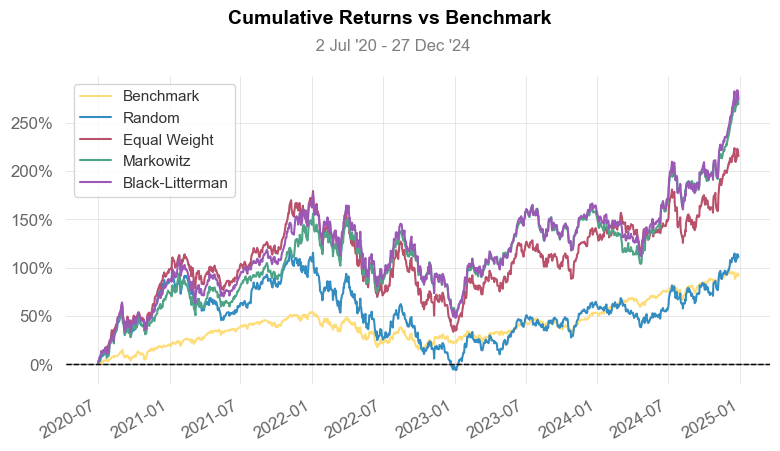

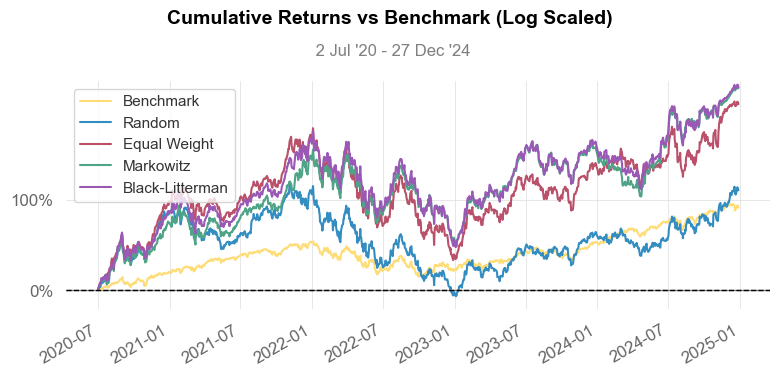

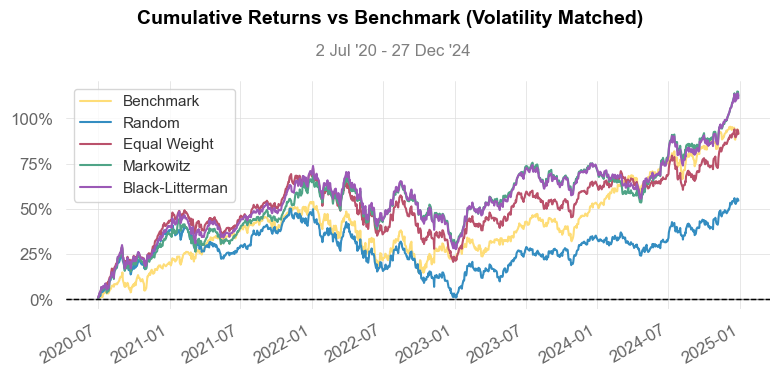

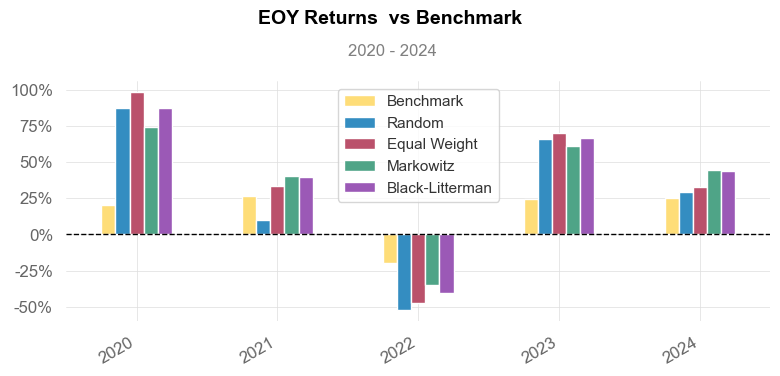

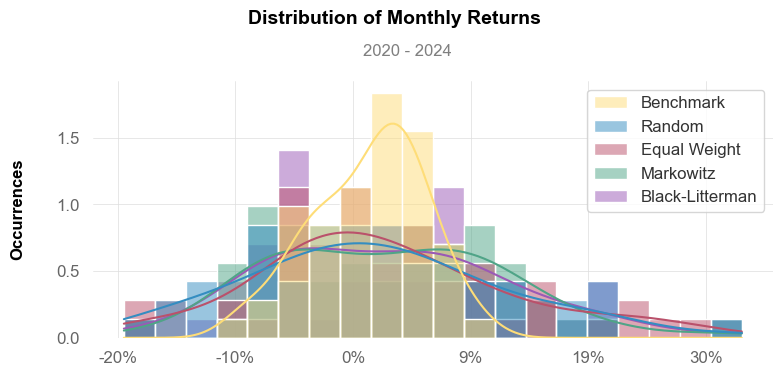

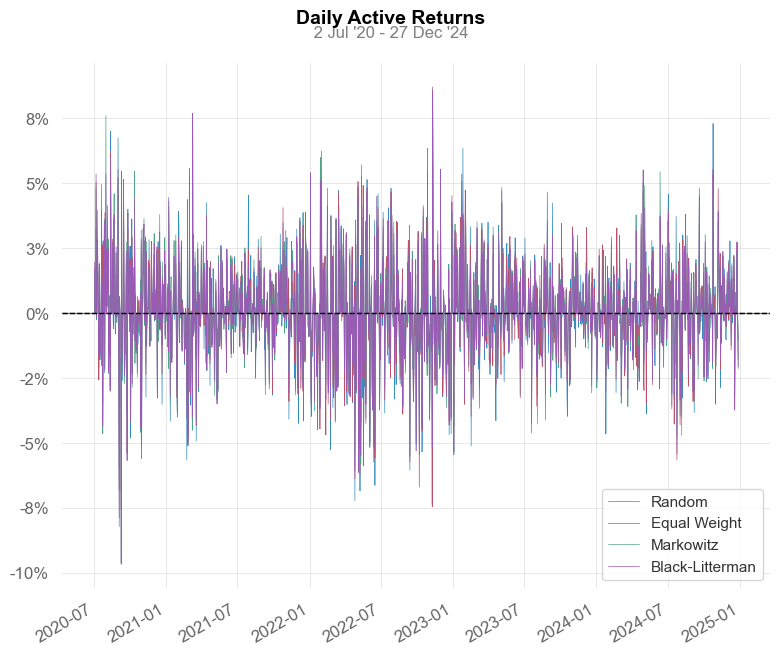

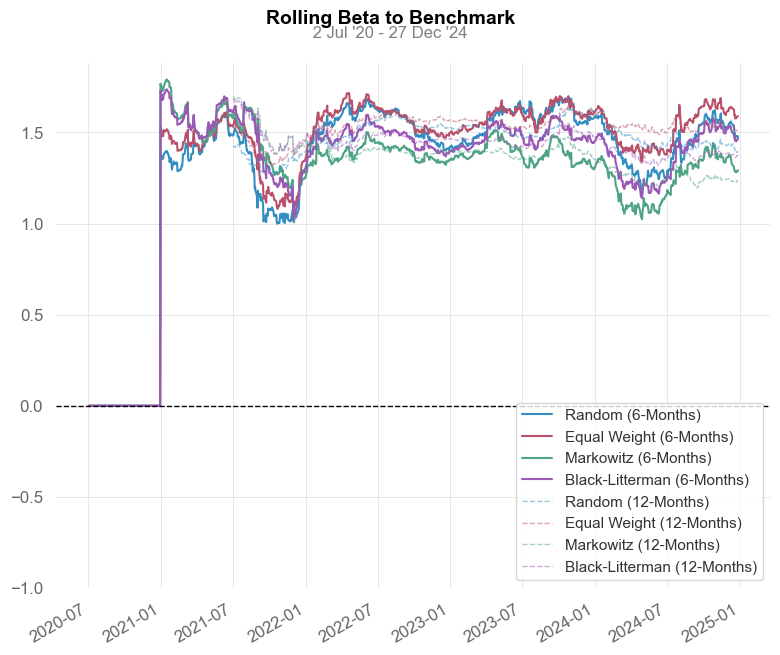

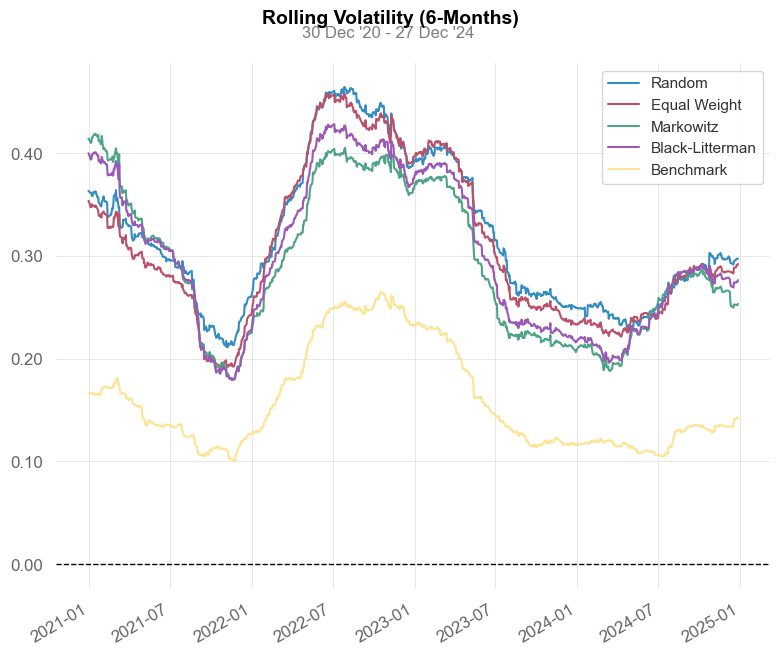

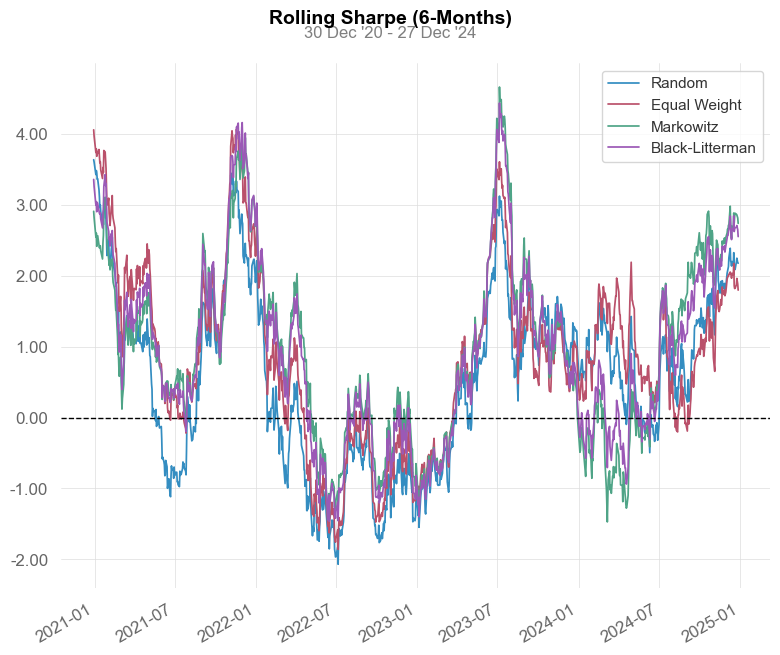

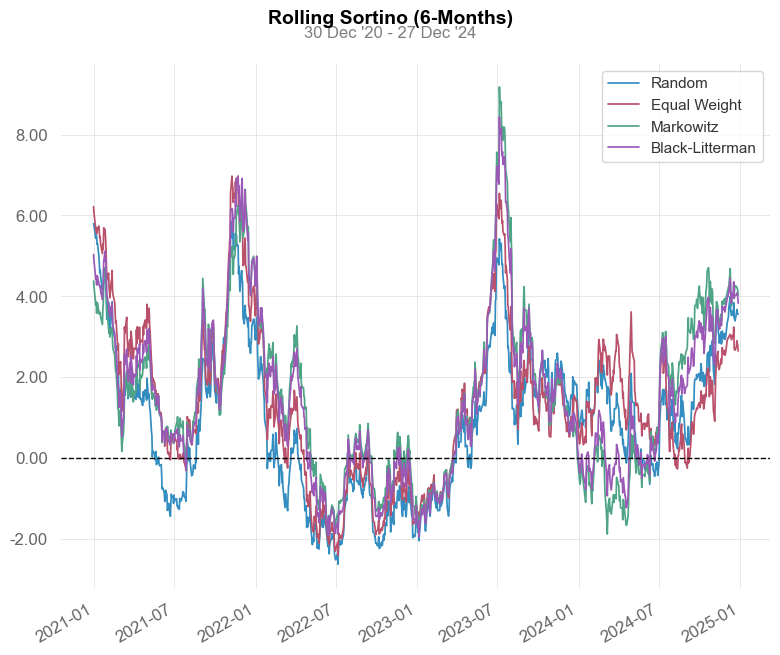

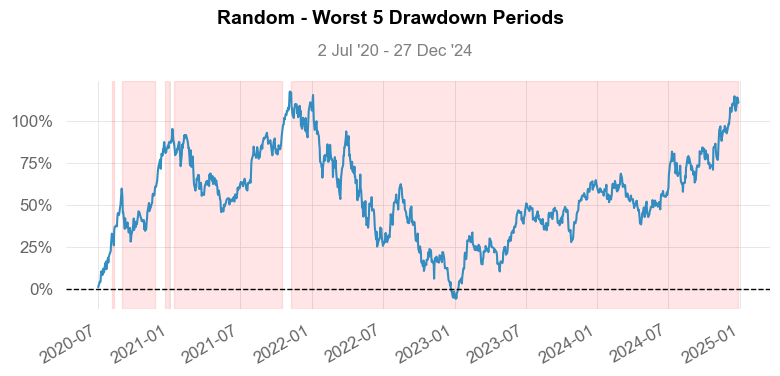

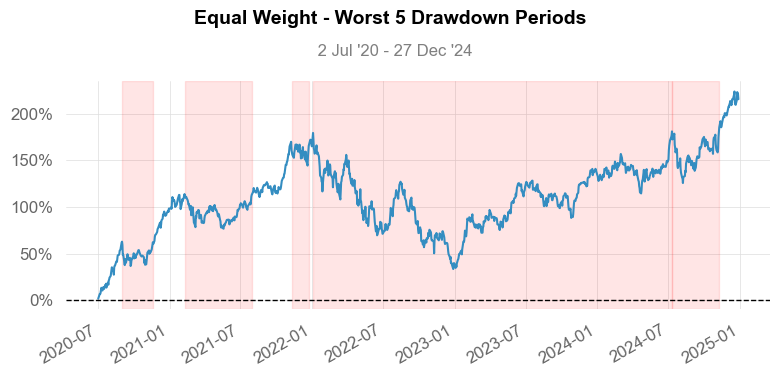

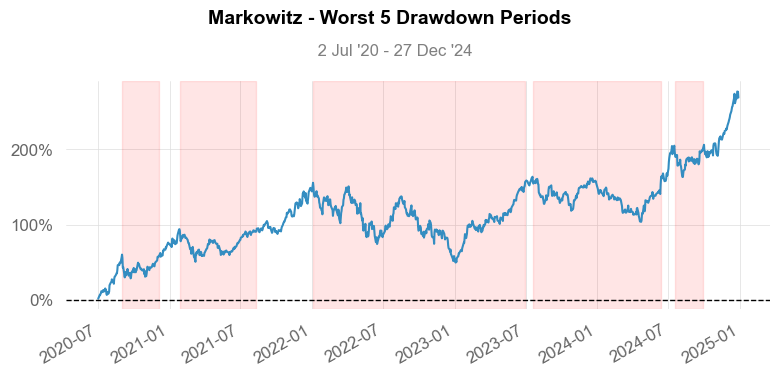

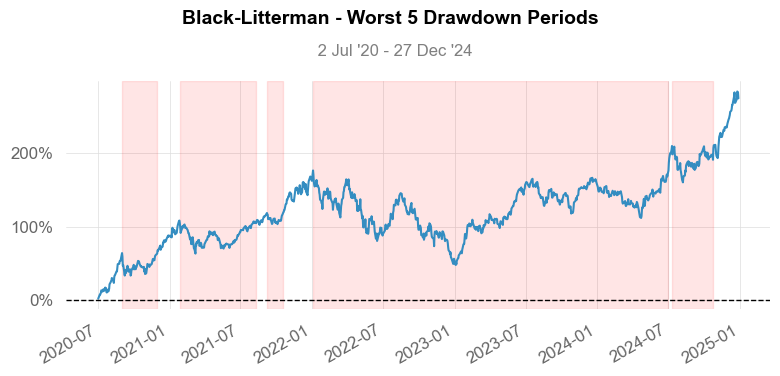

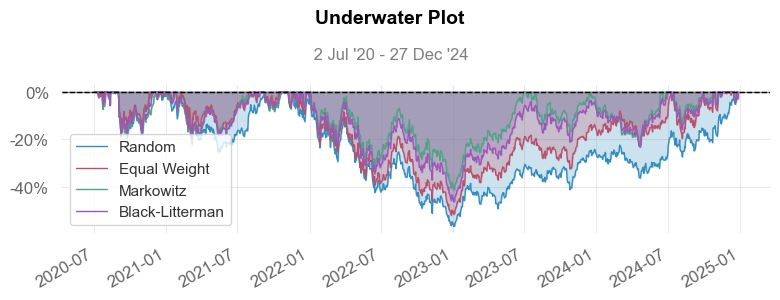

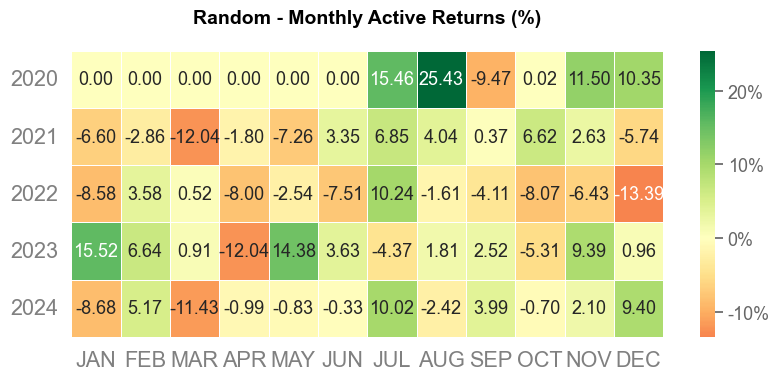

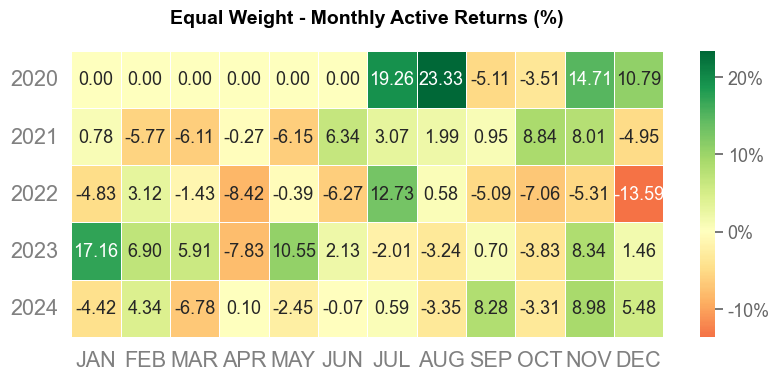

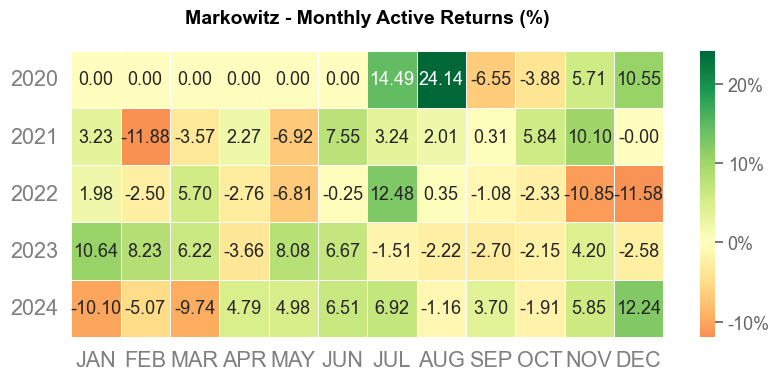

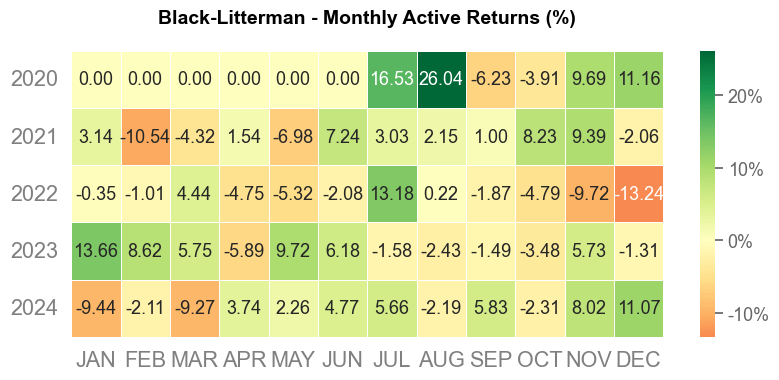

/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1021: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1024: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

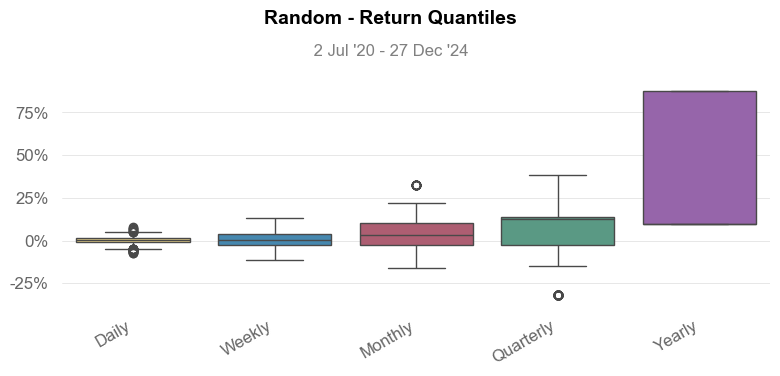

/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1021: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1024: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

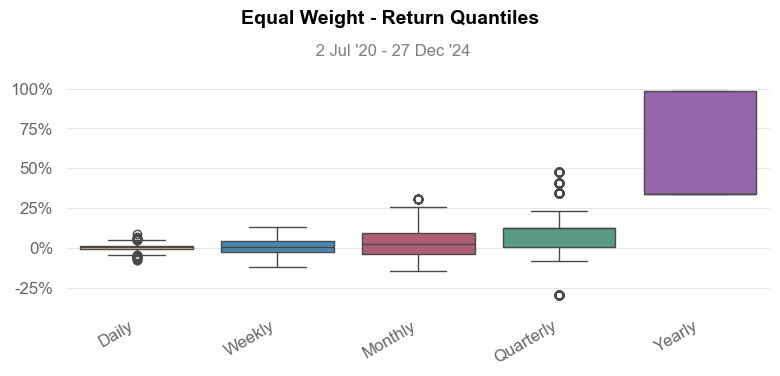

/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1021: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1024: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

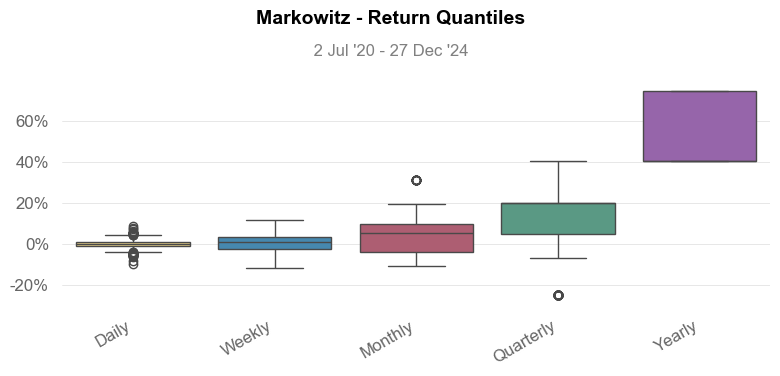

/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1021: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/daviddwlee84/Documents/Program/Personal/PortfolioOptimization/.venv/lib/python3.12/site-packages/quantstats/_plotting/core.py:1024: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

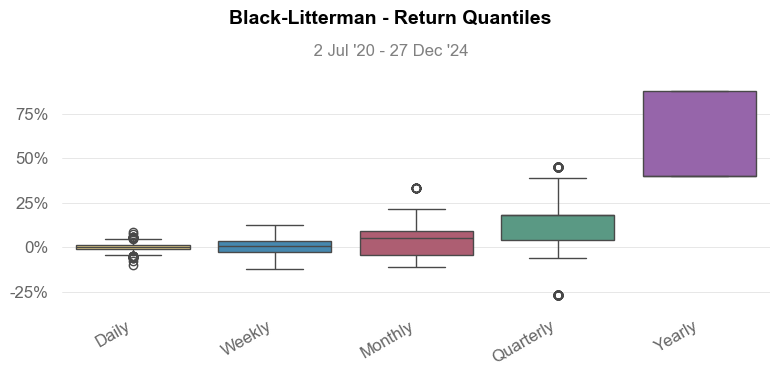

In [44]:
qs.reports.full(portfolio_returns, benchmark=sp500, prepare_returns=False)

In [45]:
# portfolio_returns.vbt.returns.qs.full_report(column='Black-Litterman', benchmark=sp500)